# DATA AQUISITION

In [13]:
##import common modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns 

In [14]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

# 1.1 SCANNING THE DATA FRAME 

In [15]:
## to view the first 5 rows

In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
#to view info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [18]:
# for dimensions of the dataset
df.shape

(299, 13)

In [19]:
# basic descriptive
#display.float_format will display only float values of the dataset and not int64 values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.000,60.834,11.895,40.000,51.000,60.000,70.000,95.000
anaemia,299.000,0.431,0.496,0.000,0.000,0.000,1.000,1.000
creatinine_phosphokinase,299.000,581.839,970.288,23.000,116.500,250.000,582.000,7861.000
diabetes,299.000,0.418,0.494,0.000,0.000,0.000,1.000,1.000
ejection_fraction,299.000,38.084,11.835,14.000,30.000,38.000,45.000,80.000
high_blood_pressure,299.000,0.351,0.478,0.000,0.000,0.000,1.000,1.000
platelets,299.000,263358.029,97804.237,25100.000,212500.000,262000.000,303500.000,850000.000
serum_creatinine,299.000,1.394,1.035,0.500,0.900,1.100,1.400,9.400
serum_sodium,299.000,136.625,4.412,113.000,134.000,137.000,140.000,148.000
sex,299.000,0.649,0.478,0.000,0.000,1.000,1.000,1.000


# 2.DATA FILTERING

In [20]:
## to find null values
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# to get count of all the missing values in each column and describe which columns are missing values and to what extent
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [22]:
#to get this data in %
df.isnull().sum()/len(df)*100

age                        0.000
anaemia                    0.000
creatinine_phosphokinase   0.000
diabetes                   0.000
ejection_fraction          0.000
high_blood_pressure        0.000
platelets                  0.000
serum_creatinine           0.000
serum_sodium               0.000
sex                        0.000
smoking                    0.000
time                       0.000
DEATH_EVENT                0.000
dtype: float64

In [23]:
#other ways to look for missing values 
import missingno as msno

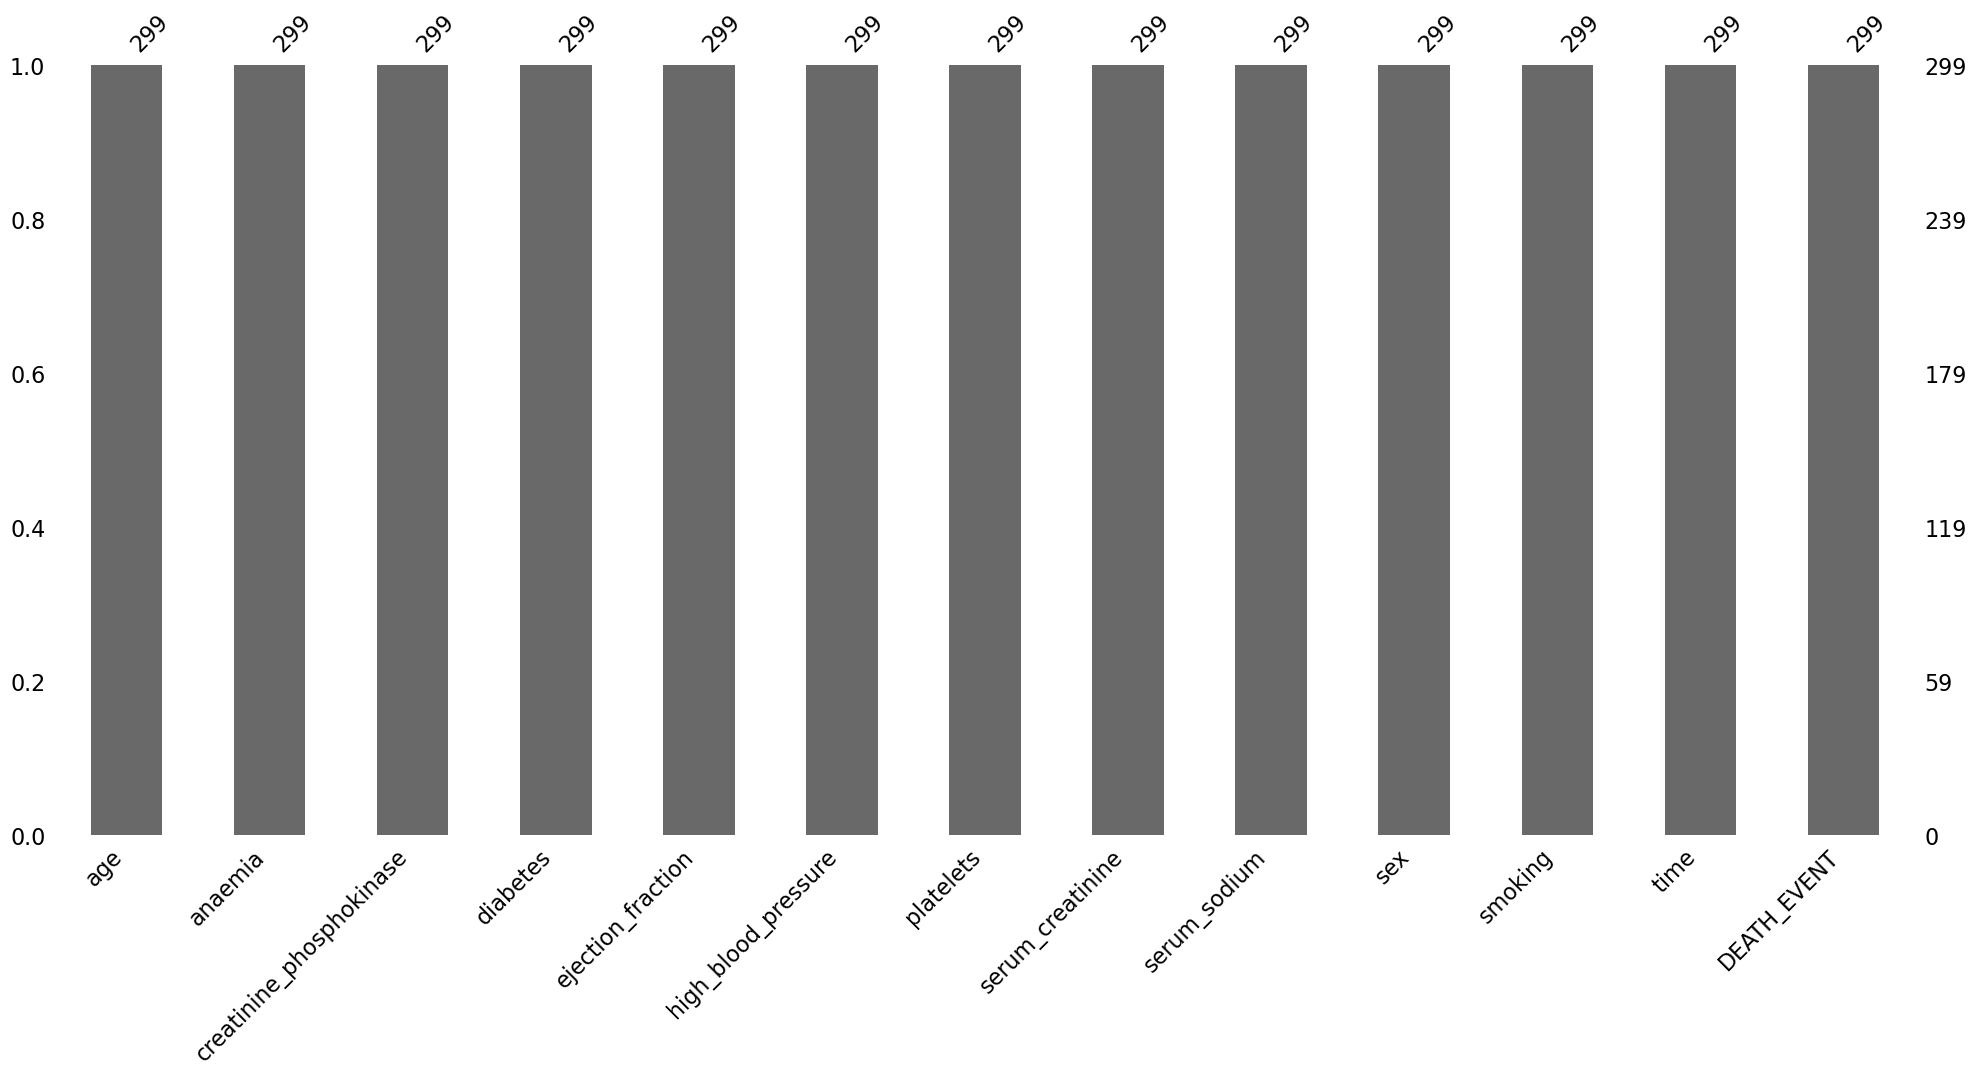

In [24]:
#to visualize relative missingness of the columns and anything thats not of length as the other bars as missing values 
msno.bar(df)
plt.show()

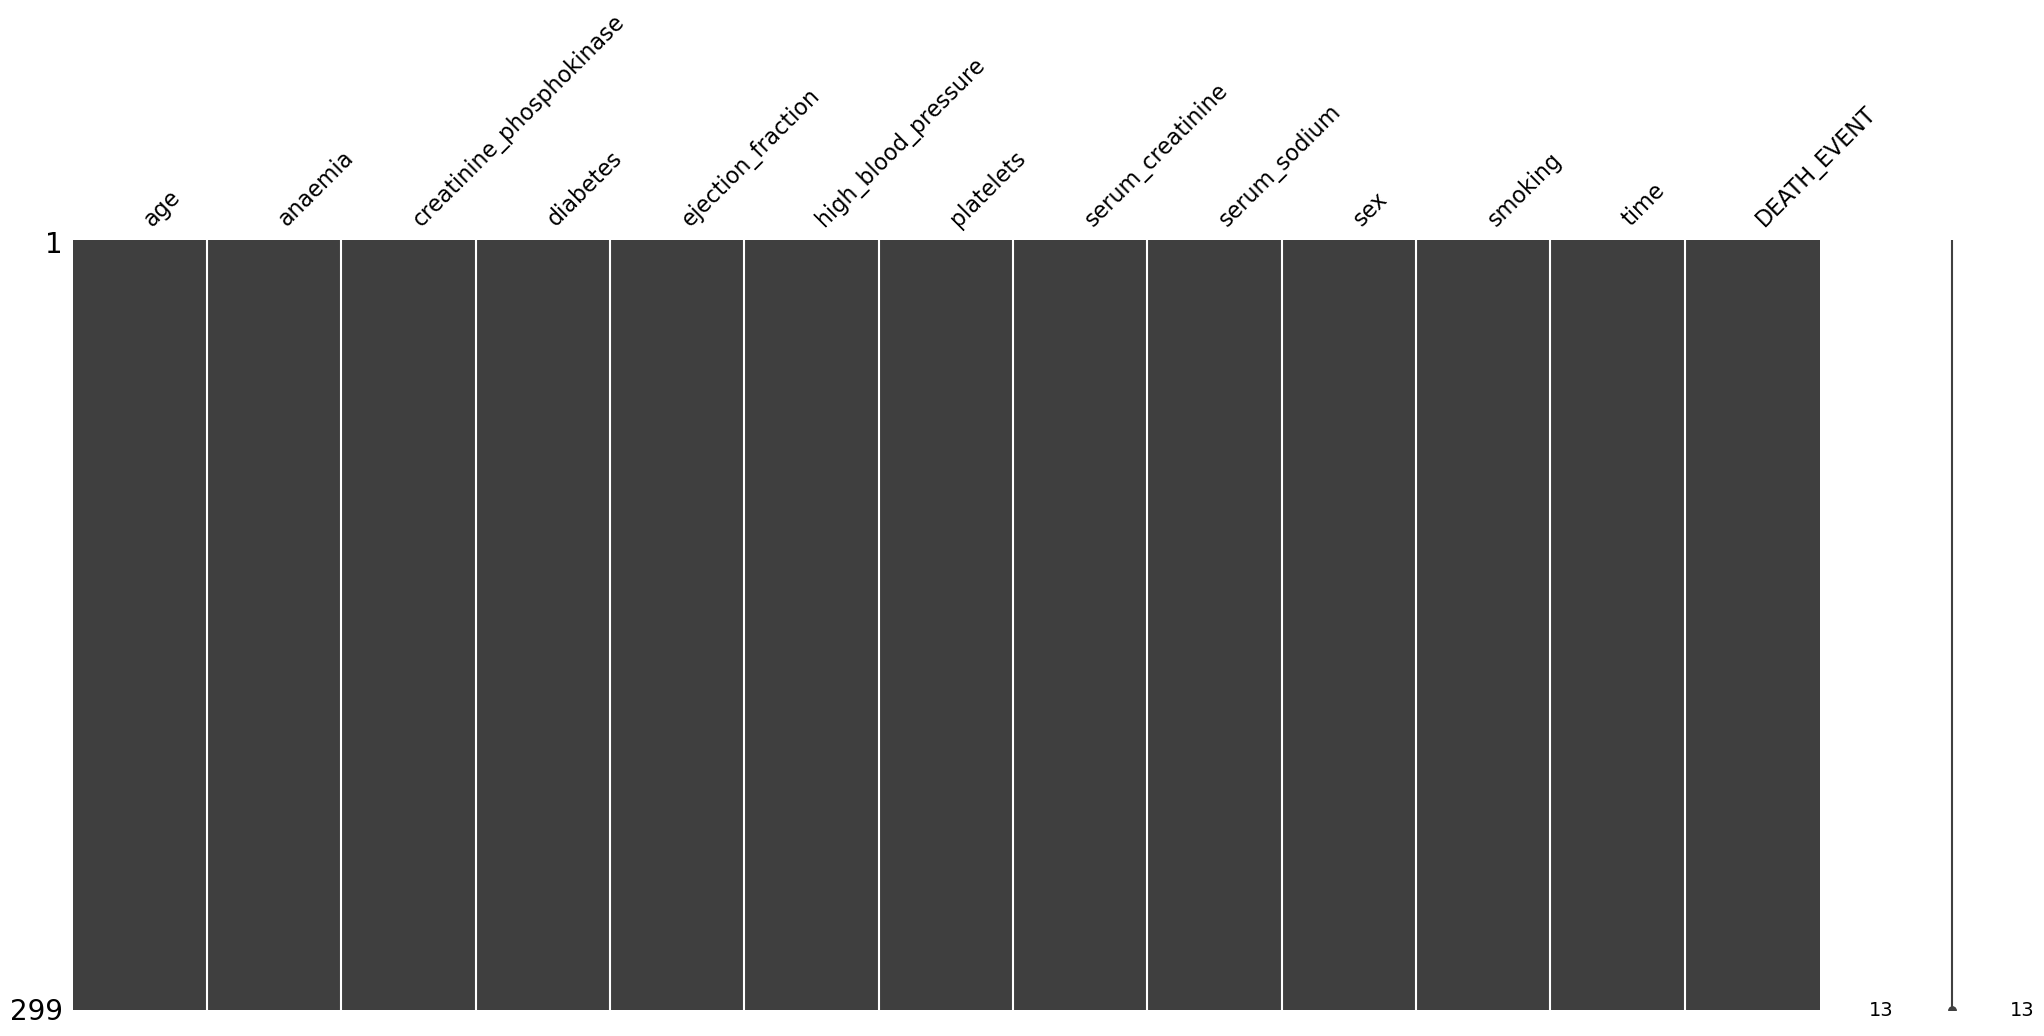

In [25]:
#to visualize the relative missingness of culumns using matrix in which it gives you a printout of the matrix when a missing 
#value occurs we will get a white space
msno.matrix(df)
plt.show()


In [26]:
#no missing values so no white spaces in matrix  and all same length bars 

In [27]:
# NO MISSING VALUES IN THE DATASET

# 2.1 CHECKING FOR DUPLICATES


In [28]:
df.duplicated().sum()

0

In [29]:
#since there are no duplicates in the dataset we dont have to drop the duplicates using df.drop_duplictes(['subset'])

# 3.TRANSFORM

In [30]:
# transform the values into a form that is suitable for modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [31]:
#convert time string to pandas datetime object
#df['time']=pd.to_datetime(df['time'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Exploratory Data analysis

## Target variable


In [33]:
df['DEATH_EVENT'].value_counts(normalize=True)

0   0.679
1   0.321
Name: DEATH_EVENT, dtype: float64

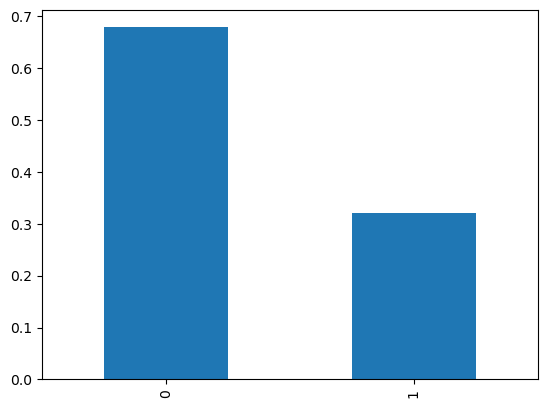

In [34]:
df['DEATH_EVENT'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [35]:
#dividing the dataset by gender
df.groupby('sex').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
sex,,,,,,,,,,,,
0,59.778,0.495,476.781,0.524,40.467,0.419,279964.022,1.384,136.790,0.038,131.905,0.324
1,61.405,0.397,638.701,0.361,36.794,0.314,254370.250,1.399,136.536,0.474,129.371,0.320


In [36]:
#if we only want to focus on target variable
df.groupby('sex')['DEATH_EVENT'].mean()

sex
0   0.324
1   0.320
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:xlabel='sex'>

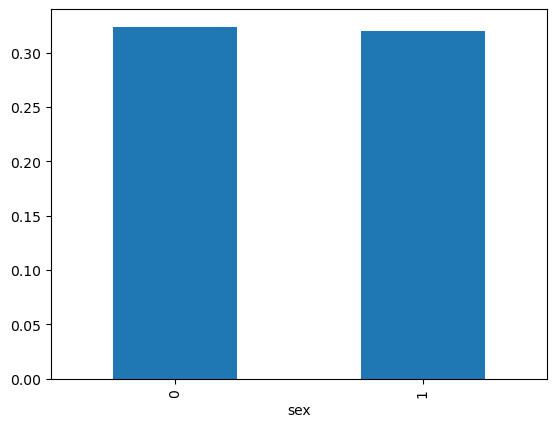

In [37]:
df.groupby('sex')['DEATH_EVENT'].mean().plot(kind='bar')

In [38]:
#replacing 0 and 1 with male and female for better readability by creating a new column

In [39]:
#df['sex_cat'] = df['sex'].replace([0,1],['male','female'])

In [1]:
#df.groupby('sex_cat')['DEATH_EVENT'].mean().plot(kind='bar')

In [2]:
#sns module allows us to plot categorical variables such as male and female
#sns.catplot(data=df,y='DEATH_EVENT',x='sex_cat',kind='bar')
#plt.show()

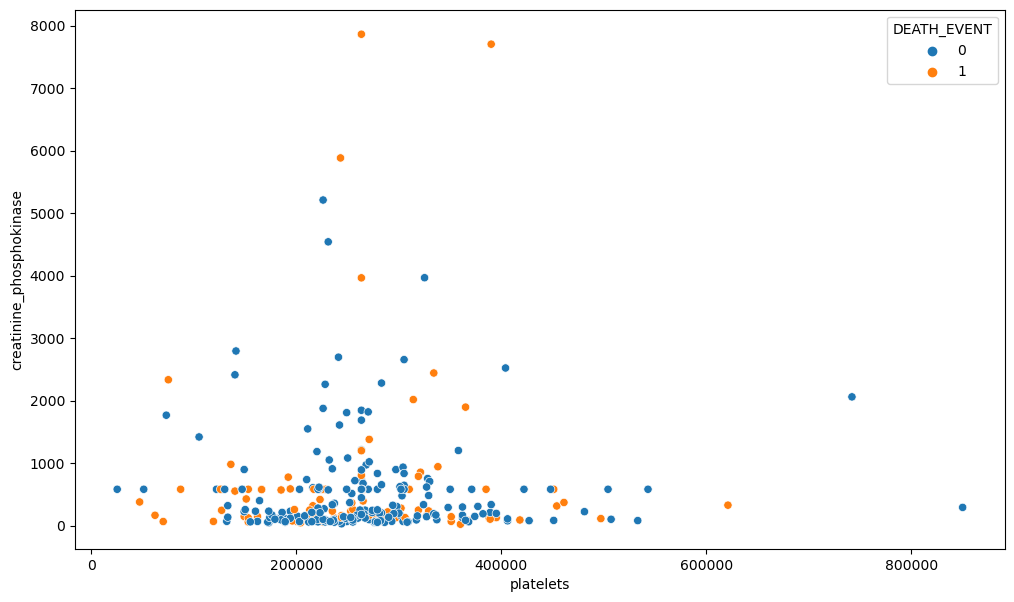

In [42]:
#to make a scatter plot on different columns for continuous variables and we can obsever any outlier datapoints along with  
#how the deaths are distributed 
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,y='creatinine_phosphokinase',x='platelets',hue='DEATH_EVENT')
plt.show()


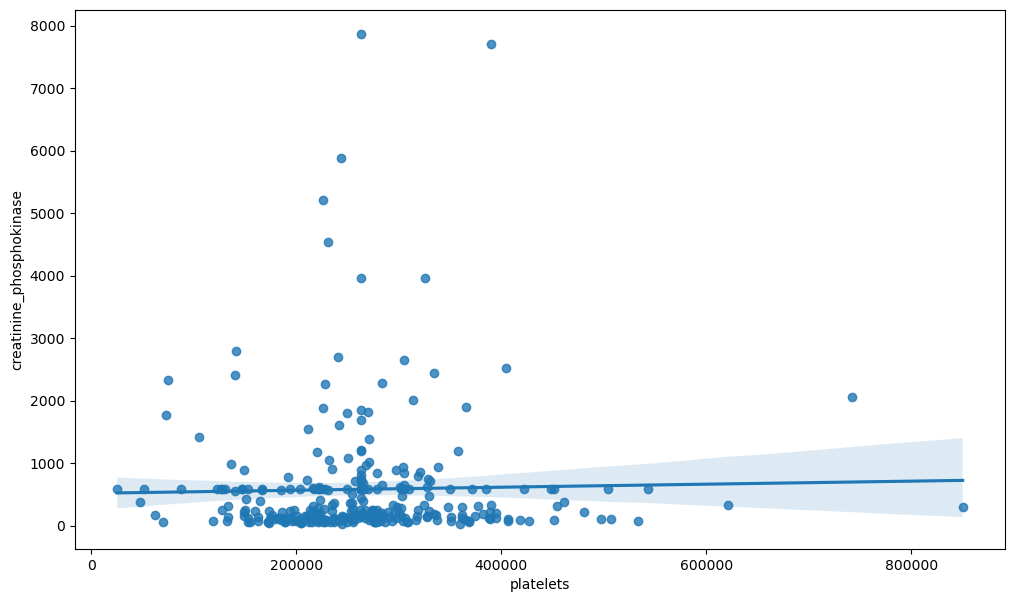

In [43]:
#we can also use sns regplot which gives us a trend line to find whether there exists any linear relationship between those 
#variables
plt.figure(figsize=(12,7))
sns.regplot(data=df,y='creatinine_phosphokinase',x='platelets')
plt.show()


In [44]:
#depending upon the angle of the trendline ,if its a steep angle there is a strong relationship and if its a small angle there
#is a week relationship and if its a straight line there is no relationship

In [45]:
cate_val=[]
cont_val=[]
for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [46]:
cate_val

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [47]:
cont_val

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [48]:
df['smoking'].unique()

array([0, 1], dtype=int64)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [51]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.193,0,0.000,0,-1.531,1,0.017,0.490,-1.504,1,0,-1.630,1
1,-0.491,0,7.515,0,-0.007,0,0.000,-0.285,-0.142,1,0,-1.604,1
2,0.351,0,-0.450,0,-1.531,0,-1.038,-0.091,-1.731,1,1,-1.591,1
3,-0.912,1,-0.486,0,-1.531,0,-0.546,0.490,0.085,1,0,-1.591,1
4,0.351,1,-0.435,1,-1.531,0,0.652,1.265,-4.682,0,0,-1.578,1


# SPLITTING DATASET INTO TRAINING SET AND TESTING SET

In [52]:
X=df.drop('DEATH_EVENT',axis=1)

In [53]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.193,0,0.000,0,-1.531,1,0.017,0.490,-1.504,1,0,-1.630
1,-0.491,0,7.515,0,-0.007,0,0.000,-0.285,-0.142,1,0,-1.604
2,0.351,0,-0.450,0,-1.531,0,-1.038,-0.091,-1.731,1,1,-1.591
3,-0.912,1,-0.486,0,-1.531,0,-0.546,0.490,0.085,1,0,-1.591
4,0.351,1,-0.435,1,-1.531,0,0.652,1.265,-4.682,0,0,-1.578
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098,0,-0.538,1,-0.007,1,-1.110,-0.285,1.447,1,1,1.803
295,-0.491,0,1.278,0,-0.007,0,0.068,-0.188,0.539,0,0,1.816
296,-1.333,0,1.526,1,1.855,0,4.902,-0.575,0.312,0,0,1.907
297,-1.333,0,1.890,0,-0.007,0,-1.263,0.006,0.766,1,1,1.933


In [54]:
Y=df['DEATH_EVENT']
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [57]:
Y_train

6      1
183    1
185    1
146    0
30     1
      ..
188    0
71     0
106    0
270    0
102    0
Name: DEATH_EVENT, Length: 239, dtype: int64

# LOGISTIC REGRESSION

In [58]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.193,0,0.000,0,-1.531,1,0.017,0.490,-1.504,1,0,-1.630,1
1,-0.491,0,7.515,0,-0.007,0,0.000,-0.285,-0.142,1,0,-1.604,1
2,0.351,0,-0.450,0,-1.531,0,-1.038,-0.091,-1.731,1,1,-1.591,1
3,-0.912,1,-0.486,0,-1.531,0,-0.546,0.490,0.085,1,0,-1.591,1
4,0.351,1,-0.435,1,-1.531,0,0.652,1.265,-4.682,0,0,-1.578,1


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [61]:
y_pred1=log.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(Y_test,y_pred1)

0.8

# SVC

In [64]:
from sklearn import svm

In [65]:
svm=svm.SVC()

In [66]:
svm.fit(X_train,Y_train)

SVC()

In [67]:
y_pred2=svm.predict(X_test)

In [68]:
accuracy_score(Y_test,y_pred2)

0.7833333333333333

# KNEIGHBOURS CLASSIFIERS

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [80]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [81]:
y_pred3=knn.predict(X_test)

In [82]:
accuracy_score(Y_test,y_pred3)

0.7166666666666667

In [90]:
#for better accuaracy 
#decalaring a list called score
score=[]
for k in range(1,239):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,y_pred))
    

In [91]:
#accuracy score for different values of k as now we can select for which k value the kneighbors provides the best accuracy 
# we can change the values of k to provide the number of required number of output
score

[0.6833333333333333,
 0.6666666666666666,
 0.75,
 0.6833333333333333,
 0.7166666666666667,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.6666666666666666,
 0.7,
 0.6833333333333333,
 0.7,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.7,
 0.6666666666666666,
 0.7,
 0.6833333333333333,
 0.7,
 0.6666666666666666,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.6666666666666666,
 0.6833333333333333,
 0.6666666666666666,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.65,
 0.6666666666666666,
 0.6333333333333333,
 0.65,
 0.65,
 0.65,
 0.6333333333333333,
 0.65,
 0.6333333333333333,
 0.6333333333333333,
 0.6166666666666667,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6166666666666667,
 0.6333333333333333,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.6

In [95]:
#as we see above for k = 3 we have the highest accuracy(75%) so we will put n_neighbor=3)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
accuracy_score(Y_test,y_pred)

    

0.75

# NON LINEAR ML ALGORITHMS

In [96]:
#for non linear ml algorithms pre-processing is not required
#hence we are not required to perform data encoding and feature scaling so we can upload dataset once again
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")


In [97]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.000,1.900,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.030,1.100,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.000,1.300,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.000,1.900,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.000,2.700,116,0,0,8,1


In [98]:
#remove duplicates
data=data.drop_duplicates()

In [100]:
data.shape

(299, 13)

In [102]:
#separating dependent and independent variables
X=data.drop('DEATH_EVENT',axis=1)
Y=data['DEATH_EVENT']

In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt=DecisionTreeClassifier()

In [106]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [107]:
y_pred4=dt.predict(X_test)

In [108]:
accuracy_score(Y_test,y_pred4)

0.65

# Random Forest Classifier


In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf=RandomForestClassifier()

In [111]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [112]:
y_pred5=rf.predict(X_test)

In [113]:
accuracy_score(Y_test,y_pred5)

0.7166666666666667

# Gradient Boosting Classifier

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
gbc=GradientBoostingClassifier()

In [116]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [117]:
y_pred6=gbc.predict(X_test)

In [118]:
accuracy_score(Y_test,y_pred6)

0.7333333333333333

In [121]:
#to compare accuracy score from different models we will use a barplot
#declaring a varible and creating a panda dataframe using python dictionary
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
            'Accuracy':[accuracy_score(Y_test,y_pred1),
                       accuracy_score(Y_test,y_pred2),
                       accuracy_score(Y_test,y_pred3),
                       accuracy_score(Y_test,y_pred4),
                       accuracy_score(Y_test,y_pred5),
                       accuracy_score(Y_test,y_pred6)]})

In [122]:
final_data

,Models,Accuracy
0,LR,0.800
1,SVM,0.783
2,KNN,0.717
3,DT,0.650
4,RF,0.717
5,GB,0.733


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

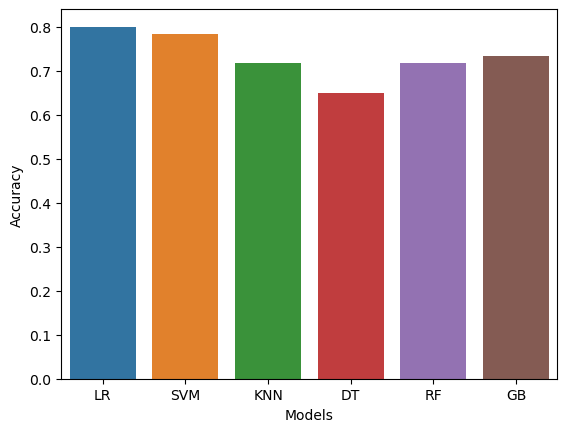

In [123]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

In [ ]:
#logistic regression provides the best result for this dataset

In [124]:
#training logistic regression model on the entire dataset
from sklearn.linear_model import LogisticRegression

In [125]:
log=LogisticRegression()
log.fit(X,Y)

LogisticRegression()

# Predicting on new data

In [127]:
new_data=pd.DataFrame({
    'age':72.0,
    'anaemia':1,
    'creatinine_phosphokinase':165,
    'diabetes':1,
    'ejection_fraction':23,
    'high_blood_pressure':0,
    'platelets':331000.00,
    'serum_creatinine':3.5,
    'serum_sodium':120,
    'sex':1,
    'smoking':1,
    'time':6,
},index=[0])

In [128]:
new_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,72.000,1,165,1,23,0,331000.000,3.500,120,1,1,6


In [129]:
log.predict(new_data)

array([1], dtype=int64)

In [131]:
#array[1] signifies it is a patient with heart disease
#storing the result  in a variable
p=log.predict(new_data)
if p[0]==0:
    print("NO DISEASE")
else:
    print("DISEASE PRESENT")

DISEASE PRESENT


# SAVE MODEL USING JOBLIB

In [132]:
import joblib

In [133]:
joblib.dump(log,'heartDisease_prediction_model')

['heartDisease_prediction_model']

In [134]:
model=joblib.load('heartDisease_prediction_model')

In [135]:
#the model is saved and now we can use model name
model.predict(new_data)

array([1], dtype=int64)

# IMPLEMENTING GUI

In [164]:
from tkinter import *
import joblib

In [2]:
from tkinter import *
import joblib
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    model = joblib.load('heartDisease_prediction_model')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)

master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "red", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="enter anameia").grid(row=2)
Label(master, text="Enter Value of creatinine_phosphokinase").grid(row=3)
Label(master, text="Enter Value of diabetes").grid(row=4)
Label(master, text="Enter Value of ejection_fraction").grid(row=5)
Label(master, text="Enter Value of high_blood_pressure").grid(row=6)
Label(master, text="Enter Value of platelets").grid(row=7)
Label(master, text="Enter Value of serum_creatinine").grid(row=8)
Label(master, text="Enter Value of serum_sodium").grid(row=9)
Label(master, text="Enter Value of sex").grid(row=10)
Label(master, text="Enter Value of smoking").grid(row=11)
Label(master, text="Enter Value of time").grid(row=12)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()
